# Introduction


In [4]:
#import libraries
import numpy as np  # NumPy is a library for numerical computing in Python.
import pandas as pd #Pandas is a library for data manipulation and analysis.
import matplotlib.pyplot as plt #Matplotlib is a plotting library for Python.
import seaborn as sns # Seaborn is a data visualization library built on top of matplotlib.
from scipy.stats import pearsonr #This line imports the pearsonr function from the scipy.stats module. 

# Pearson's correlation coefficient is a measure of the linear relationship between two variables.

In [15]:
#let's load our database
iris_df = pd.read_csv('/content/IRIS.csv')

In [6]:
#let's take a look at our dataset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:

iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:

iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor


In [11]:
#Let's got some data about our dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris_df.shape

(150, 5)

In [ ]:
#Let's got some data about our dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


It seems that the data is all clean and ready to go 

# Explanatory Data Analysis


In [16]:
#let's look at all the different types of iris species.
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

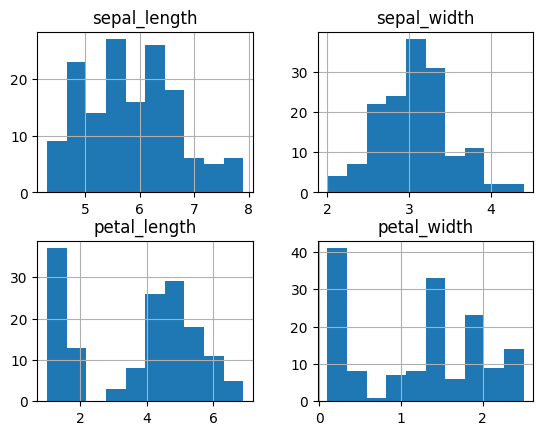

In [17]:
#Let's look at the distribution of each variable
#histogram tells us how the data is print
iris_df.hist()

Let's use a boxplot to look at the stats for the data we will use and check for any outliers.

Text(0, 0.5, 'Centimeters')

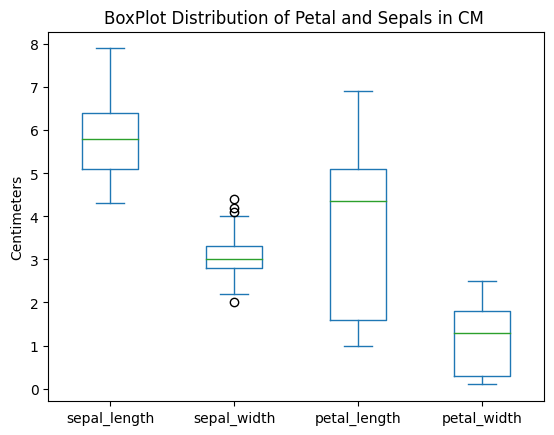

In [18]:
iris_df.plot(kind='box') #boxplot is used for check the outliers
plt.title('BoxPlot Distribution of Petal and Sepals in CM ')
plt.ylabel('Centimeters')

In [19]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It seems that the sepal_widthcolumn has some outliers. Let's try to remove them.

<Axes: >

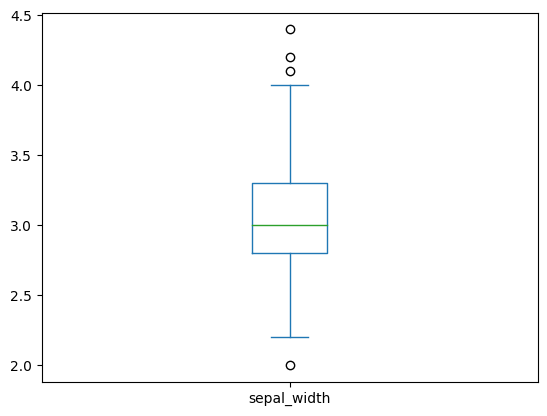

In [23]:
iris_df['sepal_width'].plot(kind = 'box')

In [27]:
iris_df[iris_df['sepal_width'] >4]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


Z Score : 

## Let's look at the distribution of each species type according to sepal length and width

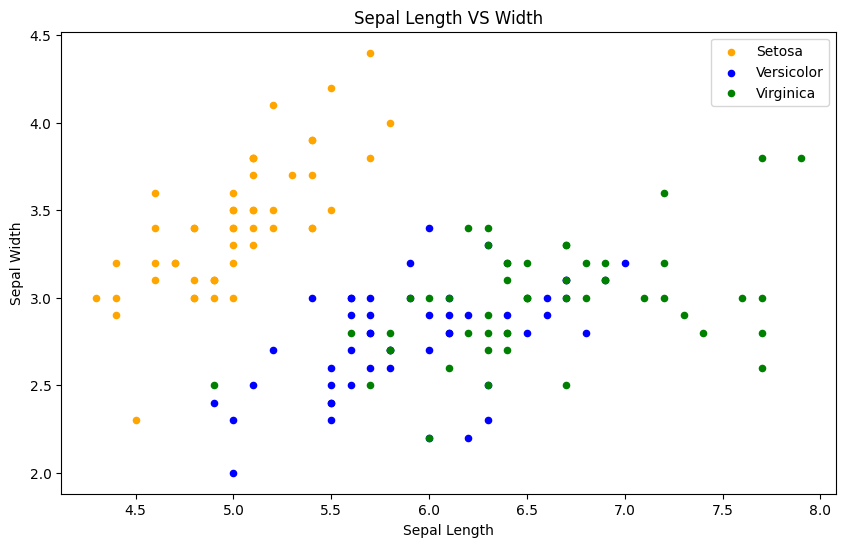

In [29]:
fig = iris_df[iris_df.species=='Iris-setosa'].plot(kind="scatter",x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris_df[iris_df.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='Versicolor',ax=fig)
iris_df[iris_df.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We can see that both sepal width and length varies for all three species. Versicolor and Virginica sepal width are almost just alike. While Setosa sepal length are much shorter but they are broader. on average, Virginca has the longest sepal length.

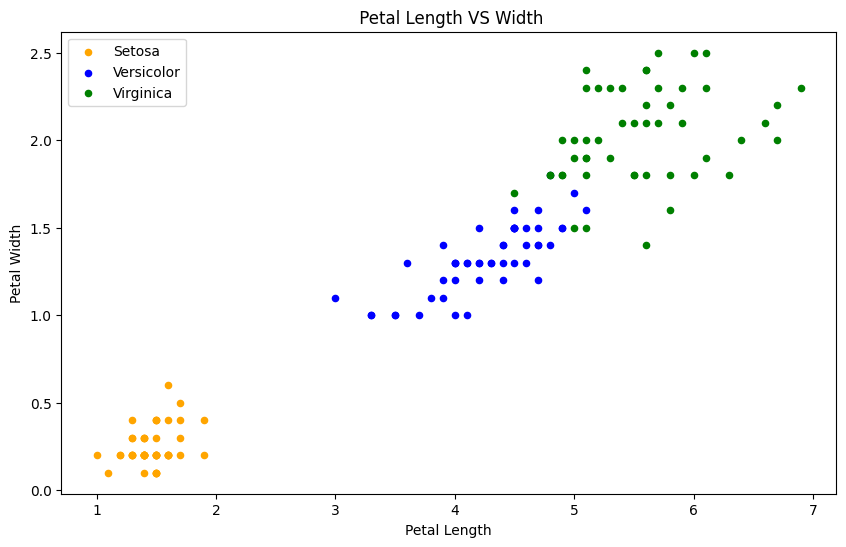

In [31]:
fig = iris_df[iris_df.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color ='orange', label='Setosa')
iris_df[iris_df.species=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='Versicolor',ax=fig)
iris_df[iris_df.species=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Here we can see that distrbution of petal length and width for the three iris species. On Average, the Setosas have a much shorter lenth and width. Next in line is the Versicolor. And then the Virginicas have the longest length and width. We also see a clear poisitive line going up, as the lentgh of the petal increases, so does the petal width. 

In [34]:
iris_df.corr()  #corr is a built in fun to find the relation of the values

<ipython-input-34-ccc75c147d59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()  #corr is a built in fun to find the relation of the values


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Are there any Correlations?

<ipython-input-37-529cc06dccc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), cmap="OrRd",annot = True)


<Axes: >

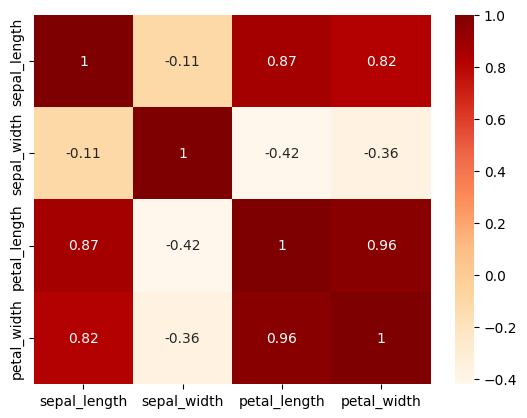

In [37]:
sns.heatmap(iris_df.corr(), cmap="OrRd",annot = True)

Here we can see a higher correlation among PetalLength with all of the other variables. With this, Petal Length might be a better indicator on how big the blossoms will be this year. We try to predict the petal length for this study.
Let's use a regression plot visualize the relationships.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

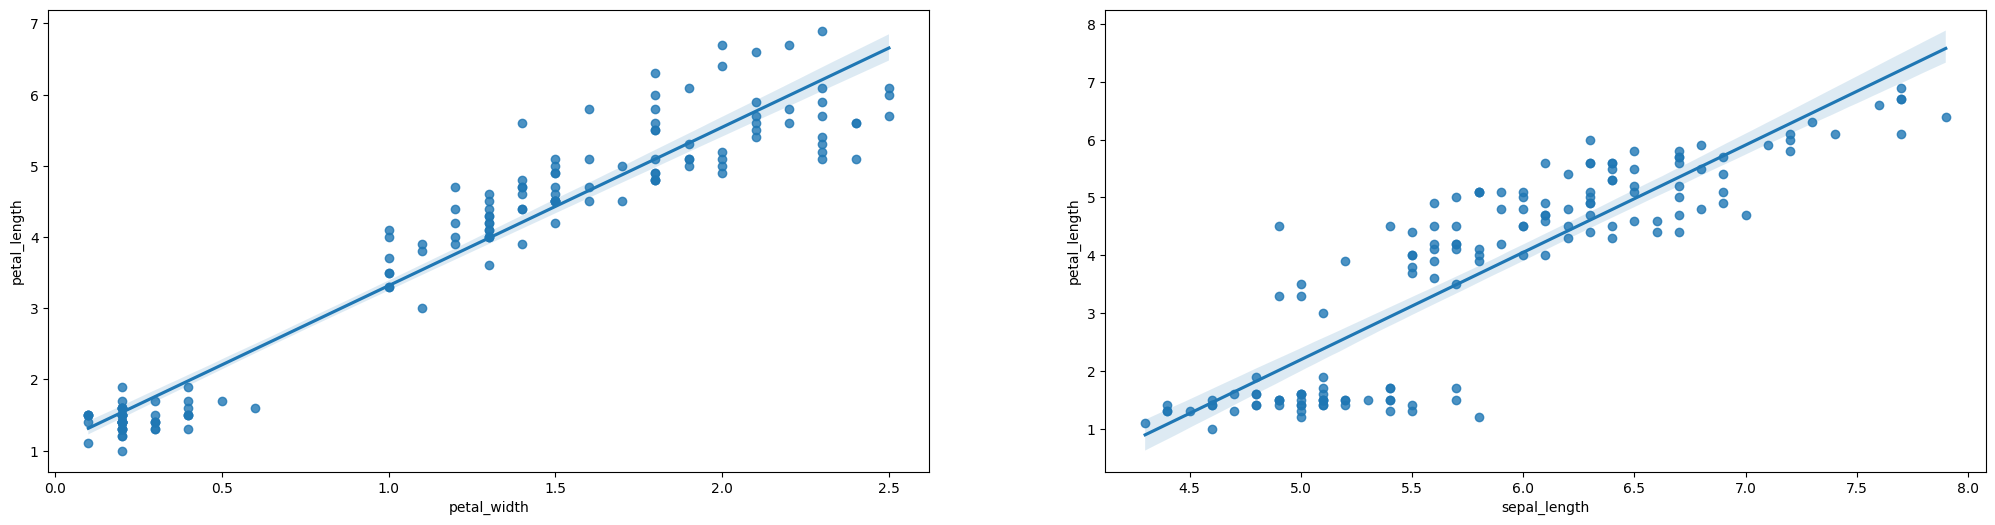

In [38]:
plt.figure(figsize=(25, 6))
#e
plt.subplot(1,2,1)
sns.regplot(x='petal_width', y='petal_length', data = iris_df)

plt.subplot(1,2,2)
sns.regplot(x='sepal_length', y='petal_length', data = iris_df)


Here we can see that both Petal Width and Sepal Length have a strong positive relationship with Petal Length. As Petal Width and Sepal Width increases so does the Petal Length!

<Axes: xlabel='sepal_width', ylabel='petal_length'>

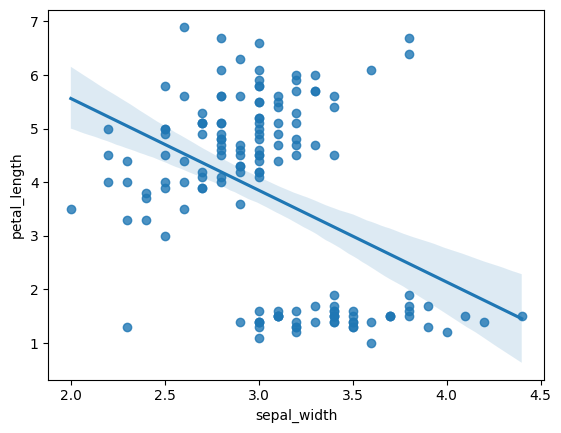

In [39]:
sns.regplot(x='sepal_width', y='petal_length', data = iris_df)

Here we can see a strong negative relationship between Petal Length and Sepal Width. As Petal Length increases, the sepal width decreases! Let's take a look at the p-value.

In [40]:
#p-value test
Petal_W_P = pearsonr(iris_df['petal_width'], iris_df['petal_length'])
Sepal_W_P = pearsonr(iris_df['sepal_width'], iris_df['petal_length'])
Sepal_L_P = pearsonr(iris_df['sepal_length'], iris_df['petal_length'])

In [ ]:
p_value_t = pd.DataFrame({'petal_width': Petal_W_P, 'sepal_width': Sepal_W_P, 'sepal_length': Sepal_L_P})
p_value_t


,petal_width,sepal_width,sepal_length
0,9.612891e-01,-0.382865,8.854826e-01
1,6.126880e-82,0.000002,1.894621e-49


We can see that p-value scores are all below 0.05, so it can be concluded that the results(relationships) are statistically significant.


# Model

In [93]:
species_2 = pd.get_dummies(iris_df['species'], drop_first=True)
species_2

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


In [47]:
#let's prepare the data for testing and training

#one hot coding 
species_2 = pd.get_dummies(iris_df['species'], drop_first=True)

X = pd.concat([species_2, iris_df[['petal_width', 'sepal_width', 'sepal_length']]], axis=1)
y = iris_df['petal_length']


In [48]:
X

,Iris-versicolor,Iris-virginica,petal_width,sepal_width,sepal_length
0,0,0,0.2,3.5,5.1
1,0,0,0.2,3.0,4.9
2,0,0,0.2,3.2,4.7
3,0,0,0.2,3.1,4.6
4,0,0,0.2,3.6,5.0
...,...,...,...,...,...
145,0,1,2.3,3.0,6.7
146,0,1,1.9,2.5,6.3
147,0,1,2.0,3.0,6.5
148,0,1,2.3,3.4,6.2


In [50]:
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [57]:
#import all the neccesary libraries we will use 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import metrics

# By standardizing the features, you ensure that they are all on a similar scale, 
# which can improve the performance of the algorithm and make it more fair to all the features.

In [58]:
#lets first split the data into training and spliting

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state = 0)

In [59]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(112, 5) (38, 5) (112,) (38,)


In [62]:
#Let's start with multilinear regression
Input = [('scaler', StandardScaler()),('mode', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
pipe_y = pipe.predict(test_X)
ml_score = pipe.score(test_X, test_y)

In [63]:
ml_score

0.9634012405176948

In [75]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('mode', RandomForestRegressor())])

In [82]:
#How about a RandomForest tree 
Input = [('scaler', StandardScaler()), ('mode', RandomForestRegressor())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
rf_predictions = pipe.predict(test_X)
rf_score = pipe.score(test_X, test_y)

In [81]:
rf_score

0.969952954733275

In [84]:
decis_score

0.9571213155508461

In [85]:
#How about a decision tree ?
Input = [('scaler', StandardScaler()), ('mode', DecisionTreeRegressor())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
pipe_y = pipe.predict(test_X)
decis_score = pipe.score(test_X, test_y)

In [86]:
#Kneigbor model
Input = [('scaler', StandardScaler()), ('mode', KNeighborsRegressor(n_neighbors = 4))]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
pipe_y = pipe.predict(test_X)
kn_score = pipe.score(test_X, test_y)

In [88]:
kn_score

0.9657902143679508

# Model Evaluation
We will be using the rsquared scores to evaluate how well our models were good at predicting the Petal Length.

In [89]:
rscores = pd.DataFrame({'Mult_Linear': ml_score, 'RandomForest': rf_score, 
                       'DecisionTree': decis_score, 'KNeighbors': kn_score}, index = [ 'Accuracy'])
rscores.transpose()

,Accuracy
Mult_Linear,0.963401
RandomForest,0.968620
DecisionTree,0.955766
KNeighbors,0.965790


It seems the Random Forest Model is the best model for this dataset. It takes into account 98% of the data

In [90]:
prediction_output = pd.DataFrame({
                          'SepalLength':test_X['sepal_length'],
                           'SepalWidth': test_X['sepal_width'],
                   'petal_length':rf_predictions,                           
            'species': species_2.columns[test_X.iloc[:, 0].values] })  
         



In [92]:
prediction_output.head()

,SepalLength,SepalWidth,petal_length,species
114,5.8,2.8,5.256,Iris-versicolor
62,6.0,2.2,4.219,Iris-virginica
33,5.5,4.2,1.466,Iris-versicolor
107,7.3,2.9,6.028,Iris-versicolor
7,5.0,3.4,1.451,Iris-versicolor
